In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-17 12:59:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-17 12:59:07 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-02-17 12:59:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   229MB/s    in 0.7s    

2022-02-17 12:59:10 (229 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
test_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 20.586735  15.586735  11.586735]
   [ 18.428572  13.428571   9.428571]
   [ 17.785713  13.        10.      ]
   ...
   [196.87253  168.35725   76.79092 ]
   [196.11731  167.96938   76.2806  ]
   [191.91313  163.67342   73.80094 ]]

  [[ 20.        15.        11.      ]
   [ 18.071428  13.071428   9.071428]
   [ 16.785713  12.         9.      ]
   ...
   [186.72974  154.54091   57.413376]
   [191.0816   158.50511   61.5051  ]
   [187.59677  155.78564   60.57132 ]]

  [[ 21.07653   16.07653   13.07653 ]
   [ 19.285713  14.285714  11.285714]
   [ 18.        13.214286  10.306123]
   ...
   [179.14294  143.71437   50.35723 ]
   [183.71428  148.2857    55.07144 ]
   [176.709    141.28043   49.923286]]

  ...

  [[136.92862  131.92862  137.92862 ]
   [135.15825  130.15825  134.15825 ]
   [135.35722  131.35722  132.35722 ]
   ...
   [121.785736 110.785736 106.785736]
   [122.87248  111.87248  107.87248 ]
   [124.01015  113.01015  109.01015 ]]

  [[137.88263  132.88263  138.8826

### Functionlal API

In [ ]:
## model 0: Building a model with using FUNCTIONAL API

In [ ]:
#1. Create the Base model
base_model=tf.keras.applications.EfficientNetB0(include_top= False)

#2. Freeze the base model ( During training The patterns arent updated)
base_model.trainable = False

#3. Create inputs
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

#4. a model like  Resnet 50v2 you need the normalize outputs but efficient net doesnot requires
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. pass the inputs to the base model
x= base_model(inputs)
print(f"Shape after passing inputs through base model :{x.shape}")
#6. Avarage pool the outputs of the base model
x= tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
print(f"Shape after globalAveragePool2d :{x.shape}")

#7. Create output layer
outputs= tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# 8. Combine the inputs and outputs for model
model_0= tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_0= model_0.fit(train_data_10_percent,
                      epochs=5,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data,
                       validation_steps=int(0.25*len(test_data)),
                       callbacks=[create_tensorboard_callback(dir_name="tfLearning",
                                                              experiment_name="Model_0")])

Shape after passing inputs through base model :(None, 7, 7, 1280)
Shape after globalAveragePool2d :(None, 1280)
Saving TensorBoard log files to: tfLearning/Model_0/20220213-184000
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 91s 4s/step - loss: 1.9827 - accuracy: 0.3467 - val_loss: 1.4211 - val_accuracy: 0.6694
Epoch 2/5
24/24 [==============================] - 82s 3s/step - loss: 1.1834 - accuracy: 0.7360 - val_loss: 0.9653 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - 82s 3s/step - loss: 0.8596 - accuracy: 0.8080 - val_loss: 0.7749 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - 72s 3s/step - loss: 0.7068 - accuracy: 0.8427 - val_loss: 0.6707 - val_accuracy: 0.8355
Epoch 5/5
24/24 [==============================] - 81s 3s/step - loss: 0.6052 - accuracy: 0.8613 - val_loss: 0.6271 - val_accuracy: 0.8322


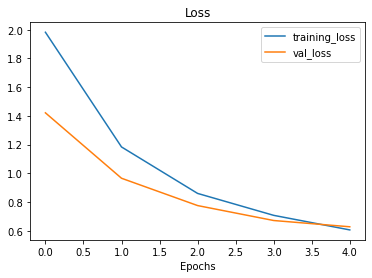

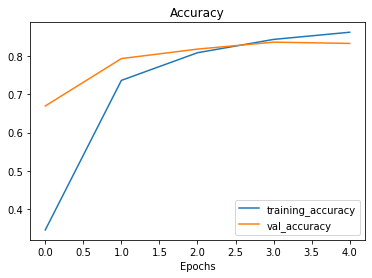

In [ ]:
plot_loss_curves(history_0)

In [ ]:
# Define a input shape
input_shape=(1,4,4,3)

#Random tensor
tf.random.set_seed(21)
input_tensor= tf.random.normal(input_shape)
print(f"Random input tensor: \n{input_tensor}")
#pass the random tensor through a global 

global_avarage_pooled_tensor= tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Tensor: \n{global_avarage_pooled_tensor},{global_avarage_pooled_tensor.shape}")

Random input tensor: 
[[[[-2.0809765   1.7485927   0.7655805 ]
   [-1.5298417  -1.1606345  -1.990461  ]
   [-0.8419037   0.02641572  0.79842937]
   [ 1.2966647   0.54007    -0.90281355]]

  [[-0.17815915  0.5964386  -0.73613346]
   [ 0.51793224 -0.02084459 -0.1800683 ]
   [-0.7879673  -0.66859514 -0.06963059]
   [-1.5045705  -1.3731335  -0.8204015 ]]

  [[ 0.17187345  0.01563148  0.9872654 ]
   [-0.1663277  -1.7720852  -2.728359  ]
   [ 1.4981952   0.57083225  0.3532868 ]
   [-0.67533845  0.79490954  1.1926516 ]]

  [[-0.09522287  0.6437009   0.43403867]
   [ 0.20280047  0.19036451 -1.0944011 ]
   [-1.8705679  -0.11107355 -0.5417807 ]
   [ 0.58770585 -0.03293135  1.7797178 ]]]]
Tensor: 
[[-0.34098148 -0.00077138 -0.17206743]],(1, 3)


## Model 1 nly 1 percent of trainnig datas

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-02-16 18:16:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   117MB/s    in 1.1s    

2022-02-16 18:16:25 (117 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'

In [ ]:
IMG_SIZE= (224,224)
train_data_1_percent= tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                     label_mode="categorical",
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=32)
test_data= tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                     label_mode="categorical",
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=32)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# Adding data augmentation 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [ ]:
#data augmentation / this layer can work with GPU so much faster than IMAGEDATAGENERATOR
data_augmentation = keras.Sequential([
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2),
  #    preprocessing.Rescale(1./255)                              
])

(-0.5, 511.5, 381.5, -0.5)

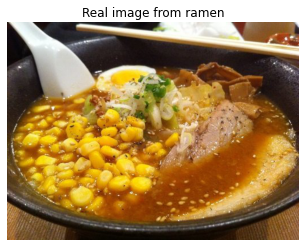

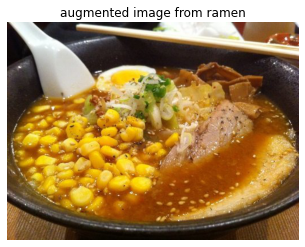

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class= random.choice(train_data_1_percent.class_names)
target_dir ="10_food_classes_1_percent/train/"+ target_class 
random_image= random.choice(os.listdir(target_dir))
random_image_path= target_dir+"/"+ random_image

#Read and plot image
plt.axis(False)
img= mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Real image from {target_class}")

#augmented image
augmented_img= data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"augmented image from {target_class}")
plt.axis("off")

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)


# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220216-191859
Epoch 1/5
3/3 [==============================] - 55s 23s/step - loss: 2.3671 - accuracy: 0.1000 - val_loss: 2.2054 - val_accuracy: 0.1760
Epoch 2/5
3/3 [==============================] - 47s 22s/step - loss: 2.1465 - accuracy: 0.2571 - val_loss: 2.0845 - val_accuracy: 0.2451
Epoch 3/5
3/3 [==============================] - 44s 21s/step - loss: 1.9417 - accuracy: 0.4000 - val_loss: 1.9870 - val_accuracy: 0.3207
Epoch 4/5
3/3 [==============================] - 45s 22s/step - loss: 1.7904 - accuracy: 0.6143 - val_loss: 1.8866 - val_accuracy: 0.4161
Epoch 5/5
3/3 [==============================] - 44s 21s/step - loss: 1.6611 - accuracy: 0.5857 - val_loss: 1.8236 - val_accuracy: 0.4342


In [ ]:
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
___________________________________________

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 130s 2s/step - loss: 1.8146 - accuracy: 0.4356


[1.814571738243103, 0.43560001254081726]

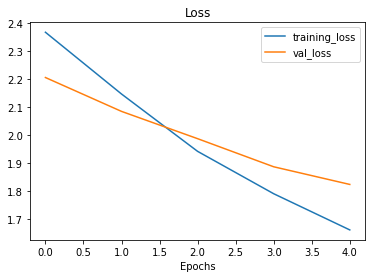

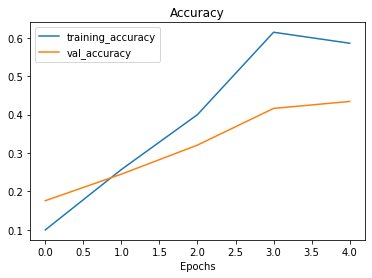

In [ ]:
plot_loss_curves(history_1_percent)

### MODEL_2 10 percent data and data augmentation

In [ ]:
# Data augmentation layer
data_augmentation= Sequential([
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomHeight(0.2),
       preprocessing.RandomZoom(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2),
       preprocessing.RandomRotation(0.2),
],name="data_augmentation")

In [ ]:

# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)


# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2= model_1.fit(train_data_10_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug")])



Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220216-194918
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.6370 - accuracy: 0.5173

KeyboardInterrupt: ignored

### Creating Model Check Point

In [ ]:
# Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a modelCheckpoint  callback that saves model weights only
Model_Checkpoint_2=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only= True,
                                save_best_only = False,
                                save_freq= "epoch",
                                verbose=1)

In [ ]:
initial_epochs=5

In [ ]:

# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)


# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2= model_2.fit(train_data_10_percent,
                    epochs=initial_epochs,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[Model_Checkpoint_2])



Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9980 - accuracy: 0.3080
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 77s 3s/step - loss: 1.9980 - accuracy: 0.3080 - val_loss: 1.5190 - val_accuracy: 0.5905
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4180 - accuracy: 0.6080
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 66s 3s/step - loss: 1.4180 - accuracy: 0.6080 - val_loss: 1.1020 - val_accuracy: 0.7336
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0877 - accuracy: 0.7200
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 66s 3s/step - loss: 1.0877 - accuracy: 0.7200 - val_loss: 0.8797 - val_accuracy: 0.7911
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9398 - accuracy: 0.7600
Epoc

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 130s 2s/step - loss: 0.7048 - accuracy: 0.8188


[0.7047978043556213, 0.8187999725341797]

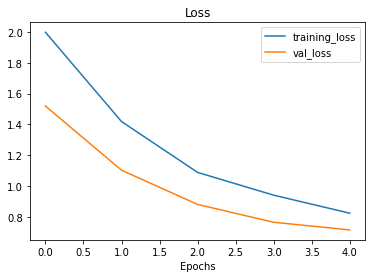

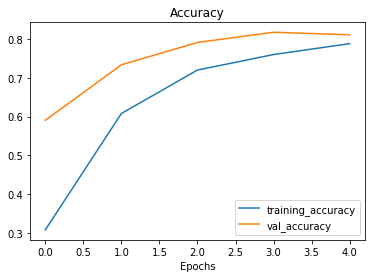

In [ ]:
plot_loss_curves(history_2)

## Loading checkpointed weights returns a model to a spesific  checkpoint

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results= model_2.evaluate(test_data)

79/79 [==============================] - 123s 2s/step - loss: 0.7048 - accuracy: 0.8188


### Model-3 find Tuning:

In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name,layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#The begining of fine tunnin

base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

# We need to recompile the base model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


* when we use fine tuning we should decrease 10x our learning rate otherwise it can cause over fitting

In [ ]:
#Check which layer are tunnable

for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for 5 epochs
fine_tune_epochs= initial_epochs + 5

#Refit the model
History_fine_10= model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             initial_epoch= history_2.epoch[-1])

Epoch 5/10
24/24 [==============================] - 187s 8s/step - loss: 0.7292 - accuracy: 0.7840 - val_loss: 0.5677 - val_accuracy: 0.8236
Epoch 6/10
24/24 [==============================] - 209s 9s/step - loss: 0.5821 - accuracy: 0.8253 - val_loss: 0.5181 - val_accuracy: 0.8304
Epoch 7/10
24/24 [==============================] - 244s 10s/step - loss: 0.5161 - accuracy: 0.8427 - val_loss: 0.5054 - val_accuracy: 0.8276
Epoch 8/10
24/24 [==============================] - 232s 10s/step - loss: 0.4667 - accuracy: 0.8627 - val_loss: 0.4946 - val_accuracy: 0.8324
Epoch 9/10
24/24 [==============================] - 188s 8s/step - loss: 0.4487 - accuracy: 0.8707 - val_loss: 0.4817 - val_accuracy: 0.8376
Epoch 10/10
24/24 [==============================] - 184s 8s/step - loss: 0.3822 - accuracy: 0.9000 - val_loss: 0.4979 - val_accuracy: 0.8340


In [ ]:
import matplotlib.pyplot as plt

def compare_history(orginal,new, ini_epochs=5):
  """
  it combines two history  objects
  """
  acc = orginal.history["accuracy"]
  loss= orginal.history["loss"]

  val_acc = orginal.history["val_accuracy"]
  val_loss= orginal.history["val_loss"]

  total_acc= acc+new.history["accuracy"]
  total_loss= loss+new.history["loss"]

  total_val_acc= val_acc+new.history["val_accuracy"]
  total_val_loss= val_loss+new.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Loss")

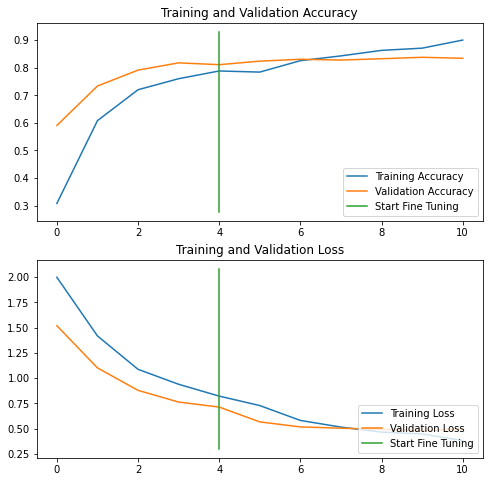

In [ ]:
compare_history(history_2,History_fine_10,ini_epochs=5)